# Tutorial Modulo Neurokit


## Inicialmente se importan los modulos con lo cuales se trabajara.
Cabe mencionar que se desarrollara un ejemplo de extraccion de caracteristicas de una señal ECG por ello importan modulos adicionales al neurokit2
Inicialmente se debe verificar si la libreria de neurokit esta instalada si no lo esta, se debe instalar mediante el comando "pip install neurokit2" una vez que la libreria esta instalada se puede empezar a trabajar con ella.

In [8]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt

Neurokit es una herramienta que simplifica en cierta medida el procesado de todo tipo de señales, ya que este tiene funciones capaces de trabajar con conjuntos de datos robustos; ademas, que dichas funciones ya estan prediseñada y solo deben ser invocadas para asegurar su correcto funcionamiento. 

Para el desarollo de este tutorial se plantea analizar, procesar y extraer caracteristicas especificas de una señal ECG, la que por facilidad fue generada con la misma libreria de neurokit. Pero cabe mencionar que la libreria de neurokit tiene datasets de datos con  los cuales se puede trabajar. Para eso se debe buscar el nombre del archivo deseado en internet y mediante la funcion "nk.data("ArchivoX")" se descargara el "ArchivoX" el cual contiene las señales con las que se desea trabajar


# Funcionamiento de la funcion nk.data() y vizualizacion de sets de datos provistos por la libreria neurokit

,ECG,PPG,RSP
0,0.003766,-0.102539,0.494652
1,-0.017466,-0.103760,0.502483
2,-0.015679,-0.107422,0.511102
3,-0.001598,-0.110855,0.518791
4,0.002483,-0.112610,0.528669


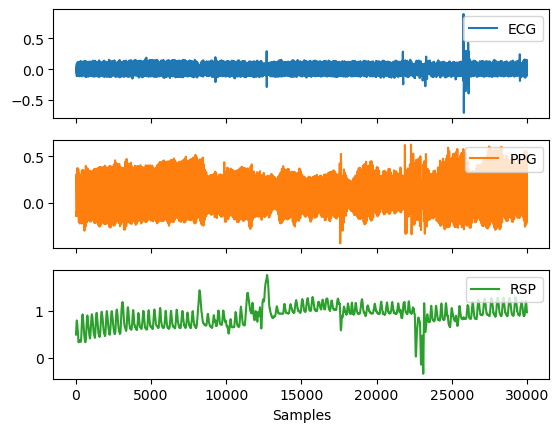

In [48]:
#Cargamos el conjunto de datos provisto por la libreria neuroki
#Este dataset incluye señales fisiologicas como ECG,PPG y RSP.
Data = nk.data("bio_resting_5min_100hz")

# Graficacion de las señales contenidas en el dataset descargado previamente
nk.signal_plot(Data, subplots=True)#subplots=Trues permite mostrar cada señal en un grafico diferente
#Se muestra la disposicion de los datos contenidos en el dataset descargado
Data.head()

# Creacion de la señal mediante la liberia neurokit

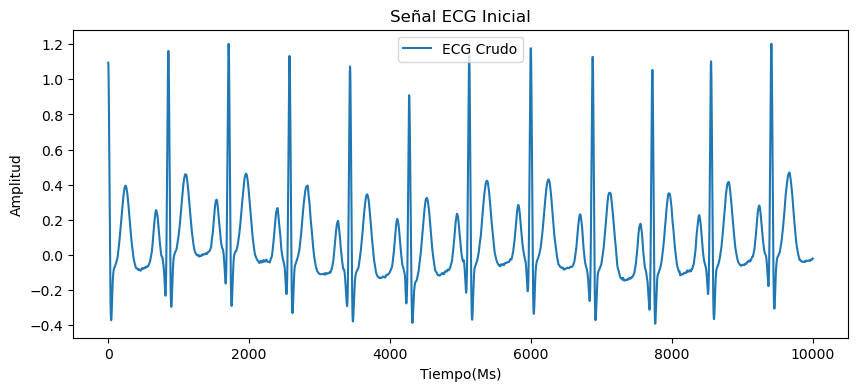

In [10]:
#Se simula una señal ECG durante 10 segundo con una frecuencia cardiaca de 70 bpm
ecg = nk.ecg_simulate(duration=10, heart_rate=70)#ecg_simulated genera la señal ECG artificial con la que se trabajara

# Se crea un DataFrame para estructurar los datos simulados
data = pd.DataFrame({"ECG" : ecg,})

#Se grafica la señal simulada para inpeccionar la señal de trabajo 
plt.figure(figsize=(10, 4))
plt.plot(ecg, label="ECG Crudo")
plt.title("Señal ECG Inicial")
plt.xlabel("Tiempo(Ms)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

# Proccesamiento de la señal y extraccion de datos 

En ciertos casos cuando las señales presentan ruido u artefactos anomalos se debe realizar una fase de procesamiento para obtener una señal con la que se pueda desarrollar un analisis correctamente. Para este caso ya que se genero una señal artificial la cual no presenta ruido o artefactos atipicos solo se realiza un limpiado para asegurar que el procesado sea correcto

C:\Users\Juan Melo\anaconda3\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


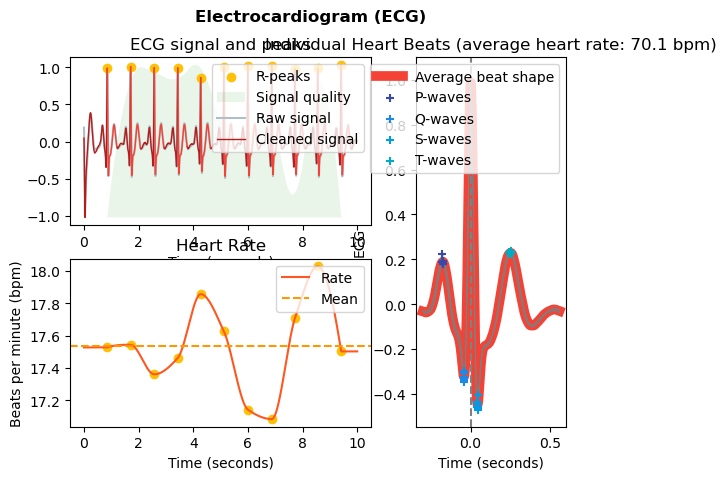

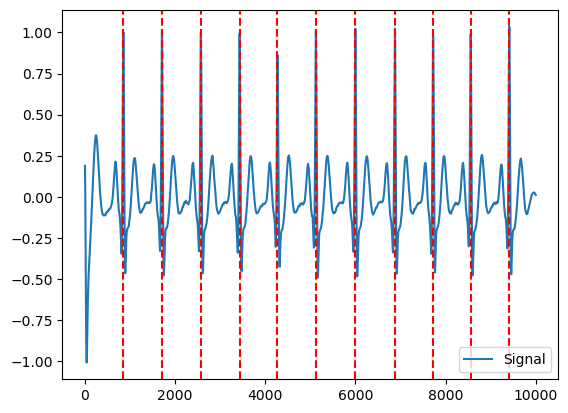

In [29]:
# Limpieza de la señal ECG usando la función `ecg_clean` de NeuroKit2
# Se utiliza un método de limpieza específico ("neurokit") y una frecuencia de muestreo de 250 Hz.
ecg_signal_cleaned = nk.ecg_clean(ecg,sampling_rate=250,method='neurokit')

# Detección de los picos R en la señal limpia
# Esta función devuelve información sobre los picos R detectados.
_,rpeaks = nk.ecg_peaks(ecg_signal_cleaned,sampling_rate=250)

# Procesamiento de la señal ECG (delimitación y extracción de características)
ecg_signals, ecg_info = nk.ecg_process(ecg_signal_cleaned, sampling_rate=250)

# Visualización de la señal limpia y las principales características
nk.ecg_plot(ecg_signals)

# Visualización de eventos específicos, como los picos R, sobre la señal limpia
# Este gráfico superpone los eventos detectados sobre la señal procesada.
plot = nk.events_plot(rpeaks['ECG_R_Peaks'],ecg_signal_cleaned)


# Se detalla el Grafico donde se extrajo los picos R

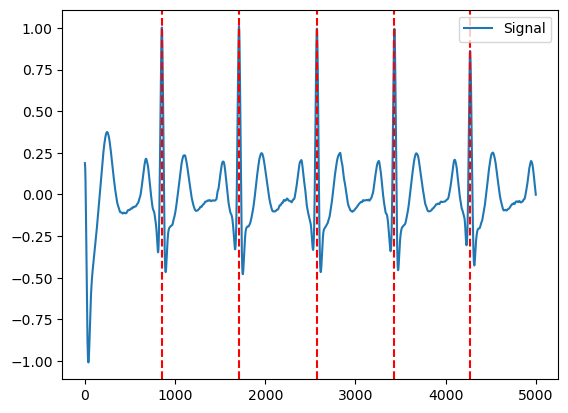

In [59]:
#Creacion de un gráfico donde se destacan los primeros 5 picos R detectados (rpeaks['ECG_R_Peaks'][:5]) dentro de un intervalo de 5000 muestras de la señal limpia (ecg_signal_cleaned[:5000]).
#Donde rpeaks['ECG_R_Peaks'][:5]: Lista con las ubicaciones (en índices de tiempo) de los primeros 5 picos R detectados.
# Ademas ecg_signal_cleaned[:5000]: Subconjunto de la señal ECG limpia que contiene 5000 muestras, ideal para un gráfico detallado.
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal_cleaned[:5000])

# Extraccion de caracteristicas complementarias que contribuyen a un analisis mejorado de las señales ECG


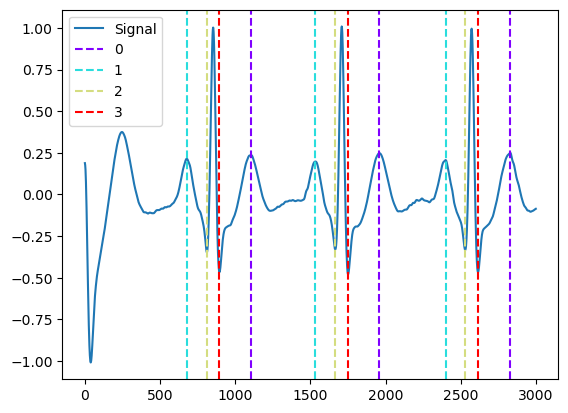

In [44]:
# Se utiliza la función `ecg_delineate` para identificar las ondas P, Q, S y T en una señal de ECG limpia.
# La función toma la señal ECG limpia (`ecg_signal_cleaned`), los picos R detectados previamente (`rpeaks`),
# la frecuencia de muestreo (250 Hz) y el método de delineado "peak" que busca los picos de las ondas.

_,waves_peak = nk.ecg_delineate(ecg_signal_cleaned, rpeaks, sampling_rate=250,method="peak")

# Se utiliza la función `events_plot` para visualizar las ubicaciones de los picos P, Q, S, T sobre la señal de ECG.
# Se extraen y se muestran las primeras 3 localizaciones de cada onda (P, Q, S, T) utilizando slices.
# Estas ubicaciones se visualizan en el primer segmento de la señal (las primeras 3000 muestras).
plot= nk.events_plot([waves_peak['ECG_T_Peaks'][:3],         #Primeros 3 picos T
                      waves_peak['ECG_P_Peaks'][:3],         #Primeros 3 picos P
                      waves_peak['ECG_Q_Peaks'][:3],         #Primeros 3 picos Q
                      waves_peak['ECG_S_Peaks'][:3]]         #Primeros 3 picos S
                     , ecg_signal_cleaned[:3000])            #Primeros 300 puntos de la señal ECG limpia